# AI Project3 Report 
----------------------------------------------------------------------

# 1. RNN
#### 循环神经网络
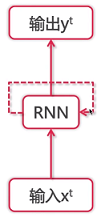

<center>上一步输出作为下一步额外的输入<br>
每一步使用同样的激活函数和参数<br></center>
\begin{align}
s_t &= f_w(s_{t-1},x_t) \\
s_t &= tanh(Ws_{t-1} + Ux_t) \\
\hat{y_t} &= softmax(Vs_t) \\
\end{align}

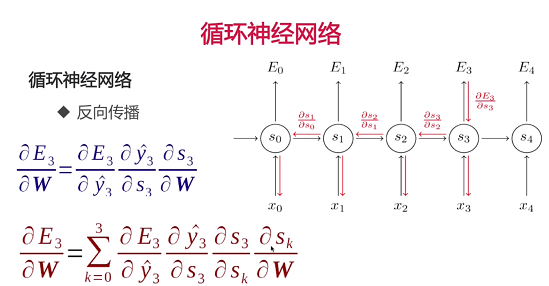

1. 多输入，多输出；每一个节点输入矩阵U，计算得$s_k$，后输出V；计算得损失函数$E_k$；
2. 反向传播，$E_3$对整个权重矩阵W导数的计算公式用的是链式法则，最后两项是指$s_3$先对$s_k$（前3项的值）求导，$s_k$再对W求导，算出该点损失函数对W的导数；
3. 真实计算中中间一项换成连乘，可以复用中间的结果，加快计算速度；
4. 因为tanh输出在$[-1，1]$，所以会导致梯度消失；较远的步骤梯度贡献很小；
5. 如果换其他激活函数，使得输出$>1$，则会导致爆炸，每一步都放大；
6. 分批地训练，计算Loss;
7. 也可以训练多层的神经网络，低层输出作为高层输入，同层依旧递归；
8. 每一层都是非线性变换，可以增加网络拟合能力；一般隐层维数递增；
9. 其他网络结构：与残差网络相结合；
10. 双向网络（获得上下文信息，两个状态拼接后进入输出层，进一步提高表达能力，无法实时输出结果）

## LSTM

普通的RNN信息不能长久传播<br>
所以要引入选择性机制：<br>
1. 遗忘门（新的一句有新的主语，就应该把之前的主语忘掉）<br>
2. 传入门（是不是要把主语的性别信息添加进来）<br>
3. 输出门（动词该用单数形式还是复数形式）

## 搜狐新闻分类任务

1. 构建计算图——LSTM模型
    * embedding
    * LSTM
    * fc（全连接层）
    * train_op
2. 训练流程代码
3. 数据集封装 api: next_batch(batch_size)
4. 词表封装 api: sentence2id(text_sentence)
5. 类别封装 api: category2id(text_category)

注意： 为了防止梯度爆炸，设置梯度上限

### Step1: 分词

分词的目的是使得句中的词语和label可以用id访问，每一项数据转换成一个矩阵，它的第一个维度是词表大小，第二个维度是embedding size（降维之后的大小）

#### 统计词表
将每一项数据综合起来，统计每个词出现的频数，用字典封装起来；

#### 词表封装
self._word_to_id = {} #内建词表 <br>
self._unk = -1  #含有特殊字符的数据项<br>
self._num_word_threshold = num_word_threshold #频数的下限<br>
self._read_dict(inputs) #建词表的方法<br>
sentence_to_id 将数据集中的句子用jieba分词转换为一个个词组，然后再在字典中找寻词组所对应的id
#### 类别封装
self._category_to_id = {} #内建类型表<br>

#### 数据集封装
设定batch_size，每隔一个batch_size，转换一遍数据集；<br>
将输入的文件转换为词表内的id的队列；<br>
将输出转换为输入句子所对应label的队列。<br>

### Step2: 训练

#### 超参数
num_embedding_size = 20, #embedding降维 <br>
num_timesteps = 50, #步数<br>
num_lstm_nodes = [32, 32],#lstm的节点<br> 
num_lstm_layers = 2, #lstm的层数<br>
num_fc_nodes = 32,#全连接层的节点<br> 
batch_size = 100, #一批有几个词<br>
clip_lstm_grads = 1.0, #最大梯度<br>
learning_rate = 0.001,#学习率<br> 
num_word_threshold = 5 #最低词频

#### embedding层
神经网络中的这一层起到了降维，减少复杂度，加快训练速度的作用。<br>
这一层中首先随机生成了一个行数为词表大小，列数为embedding_size的矩阵，数值在-1到1之间；<br>
然后再用embedding_lookup函数，将输入的矩阵对应到矩阵的相应位置，并记录数据；<br>
这个哈希的过程默认用取模(mod)的方法，还可以调整参数用除法(div)的方法。

#### lstm层
神经网络中的这一层起到了选择信息的作用；<br>
这一层其实是两层相结合的复合层,先是基本的LSTM进行信息选择，然后再用dropout遗忘信息；<br>
dropout层可以设定keep_prob，低于这个值，则需要遗忘信息；<br>
因为超参数中规定有两层lstm，所以要循环遍历；<br>
一开始将输入初始化为大小为batch_size的零向量；<br>
训练后得到大小为[batch_size, num_timesteps, lstm_outputs]的tensor，其中包含了每一个节点的输出；<br>
每个batch_size只取最后一个timesteps的全部输出，这个输出涵盖了这一整段话的全部信息。

#### fc层
神经网络中的这一层起到了转化输出结果格式的作用；<br>
第一层将lstm层的结果映射到fc_nodes上，然后再根据keep_prob进行信息筛选； <br>
第二层将结果映射到class_num上，进行分类预测。

#### metrics层
这一层通过交叉熵计算损失度和正确率。

#### train_op层
这一层通过在训练中截断梯度，限制梯度，提高准确率。

### Step3：结果

#### 训练集
在训练集上，最后的正确率可达99%到100%，已然过拟合

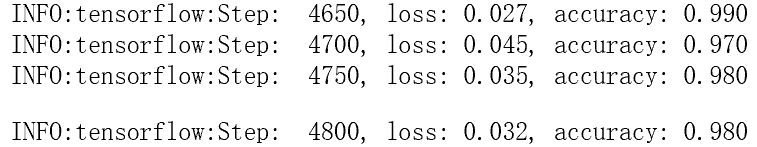
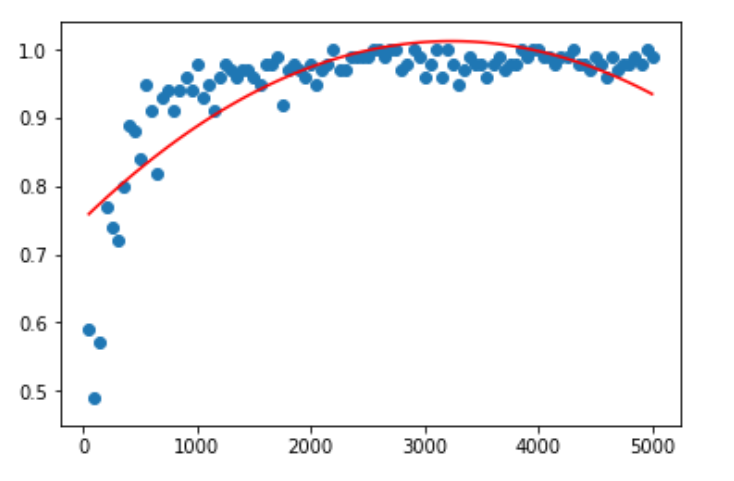

#### 测试集
在测试集上的正确率最高可达65.3%

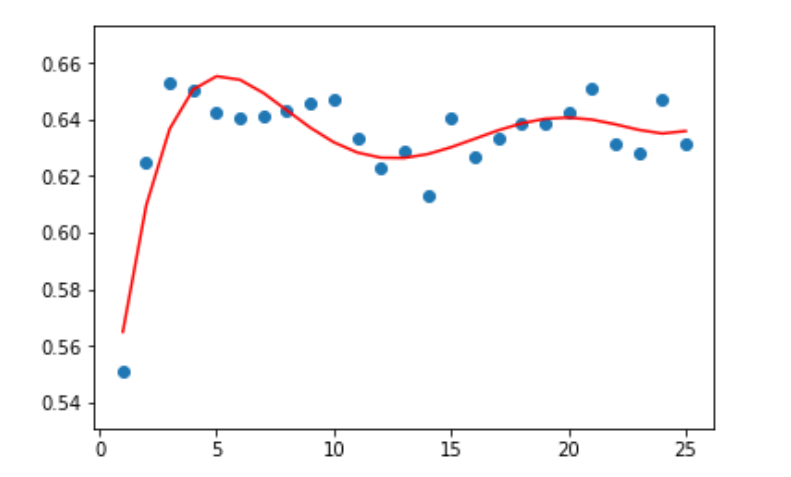

# 2. CNN
#### 卷积神经网络

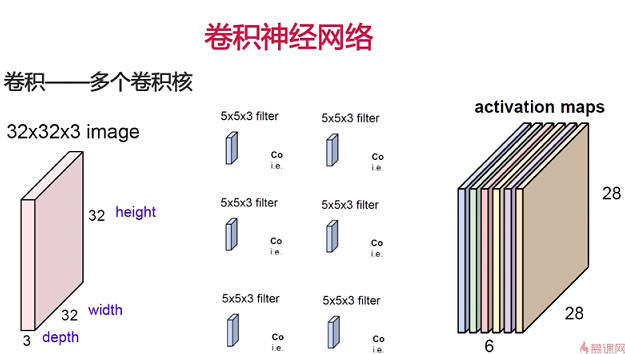

#### 卷积层
用神经网络训练图片所遇到的问题就是参数过多，容易过拟合，需要更多训练数据；或者容易收敛到局部最优值； <br>
卷积就是解决问题的方法，取一整张图片的几个局部进行训练,即局部连接，参数共享。 <br>
输入图像的每个位置与卷积核进行矩阵乘积运算后得到输出的卷积结果。<br>
如果需要输出矩阵的大小和输入矩阵相同，则需要进行padding。<br>
$output = input - kernel + 1$

如果是处理多通道(RGB值)，则需要多个卷积核
#### 激活函数
通过矩阵乘积算出输出矩阵之后，还需要进行激活函数的运算，进行非线性转换，将输出控制在一定的值域之内。<br>
这样能够得到更好的训练效果。
#### 池化层
输入图片的一定区域矩阵(由步长决定)进行一定的操作之后缩小尺寸，减少计算量。<br>
有最大池化层，均值池化层。<br>
常使用不重叠、不补零；<br>
没有用于求导的参数；<br>
池化层参数为步长和池化核的大小；<br>
一定程度解决平移鲁棒性。
#### 全连接层
神经网络中是将上一层输出展开bing连接到每一个神经元上，相比于卷积层，参数数目较大。

### 卷积神经网络结构
卷积神经网络 = 卷积层+池化层+全连接层

## cifar10图片分类任务

此次分类任务在普通的CNN结构上运用了VGGNet的思想，加深了神经网络的层数。<br>
多使用3$*$3的卷积层，扩大视野域；<br>
==>两个3$*$3的卷积层等于一个5$*$5的卷积层；
<br>==>且两层比一层更多一次非线性变换；<br>
==>达到同样的效果，参数降低28%。<br>
多使用1$*$1的卷积层，多做非线性变换；<br>
每经过一个pooling层，通道数目翻倍。

### VGGNet结构
### conv1_1 --> conv1_2 --> pooling1 --> conv2_1 --> conv2_2 --> pooling2 --> conv3_1 --> conv3_2 --> pooling3

### 结果


#### 训练集
在训练集上，最后的正确率高达85%；<br>
在测试集上，最后的正确率可达69.4%。

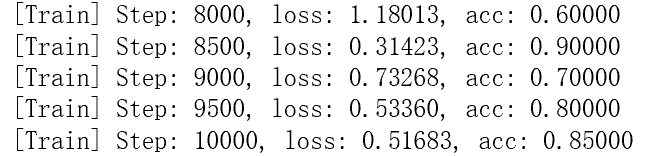
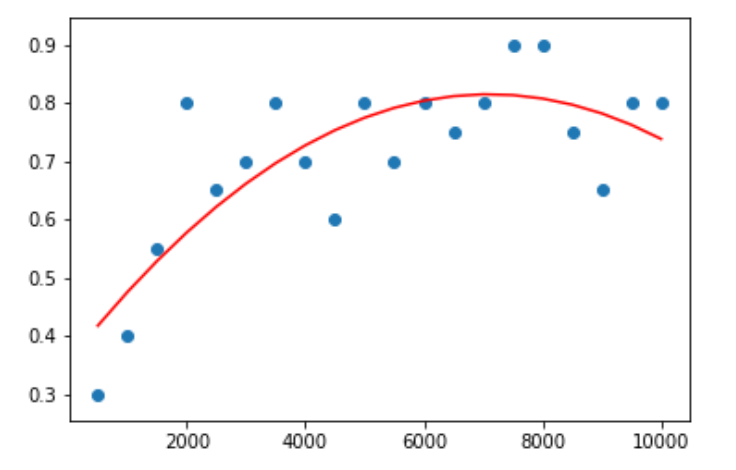

# 3.DCGAN
#### 深度卷积对抗生成神经网络——从随机向量生成真实图像

1. 定义目标
2. 定义G的输入输出（生成器）
3. 定义D的输入输出（判别器）
4. 定义G和D的结构

### Step1：定义目标
1. 生成真实的图像
2. D(x)输出判断是否是真实图像

$min_Gmax_DV(D,G) = E[logD(x)] + E[log(1-D(G(z)))]$ <br>
训练判别器，就是使V(D,G)变大；<br>
训练生成器，就是使V(D,G)变小。

### Step2：定义G的输入输出
1. 输入：随机向量
2. 输出：图像
3. 思想：利用反卷积的方法，使得图片通道数压缩，大小加倍

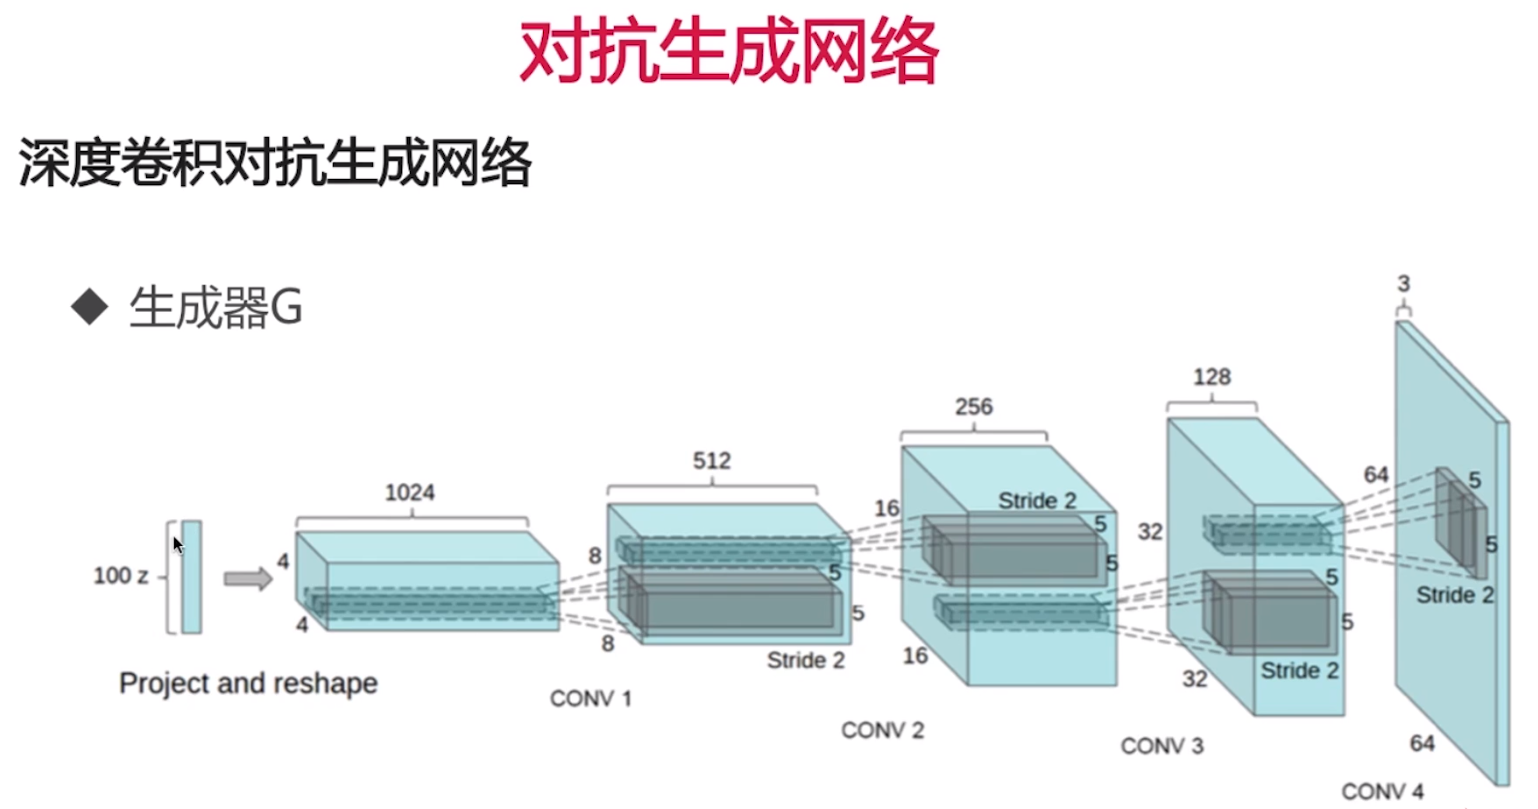

### Step3：定义D的输入输出

### Step4：模型结构
1. Pooling层用convolutional层替代，因为conv可以同样做到使得图像放大，缩小，而不会像pooling层那样损失信息。<br>
D上用strided convolution; #步长大于1，缩小<br>
G上用fractional-strided convolution.   #步长小于1，放大
2. G和D都用batch normalization <br>
帮助解决初始化差的问题；<br>
梯度传播到每一层；<br>
BN不应用于输入层和输出层。
3. 移除全连接层，使用global pooling <br>
4. G上除了输出层使用tanh外(在一定范围内)，其他都用Relu; <br>
D上使用LeakyRelu.

## 手写数字图像生成任务

#### 超参数
z_dim = 100 <br>
init_conv_size = 4<br>
g_channels = [128, 64, 32, 1]<br>
d_channels = [32, 64, 128, 256]<br>
batch_size = 128<br>
learning_rate = 0.002<br>
beta1 = 0.5<br>
img_size = 32

#### 训练过程
1. Data provider
    1. Image data
    2. random vector
2. Build compute graph
    1. generator
    2. discriminator
    3. DCGAN
3. training process

### 1. Generator
### fc(全连接层)  --> bn(batch normalization) --> relu --> deconv(128->64) --> deconv(64->32) --> deconv(32->1)  --> tanh

输入的数据先通过全连接层，将格式转换为卷积核大小；<br>
再通过归一化函数以及激活函数(relu)；<br>
之后反卷积四次，并使输出矩阵通过激活函数tanh，获取参数。

P.S激活函数有各自不同的作用，例如此处用tanh，可以将矩阵中每个元素的取值固定在[-1,1]之间。<br>
其他地方用relu，可以设定取值大于等于零。
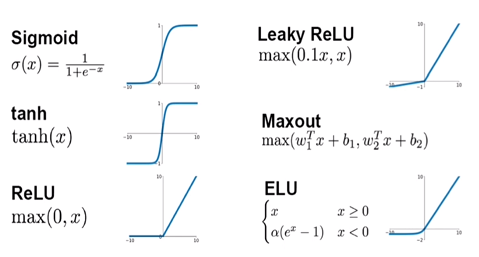

### 2. Discriminator
### conv(32->64) --> conv(64->128) --> conv(128->256) --> fc

将生成器传入的矩阵进行三次卷积操作，再通过全连接层，得到判别结果。

### 3. DCGAN
### build
定义生成器的损失函数：loss_on_fake_to_real; <br>
定义判别器的损失函数：loss_on_fake_to_fake和loss_on_real_to_real.
### train
定义AdamOptimizer的优化办法

### 结果

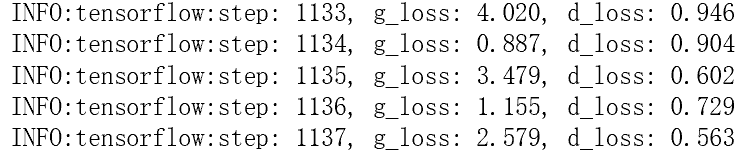

Step50: 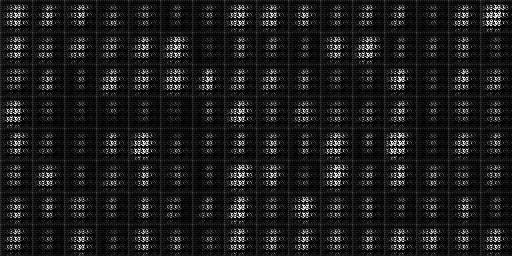
Step500: 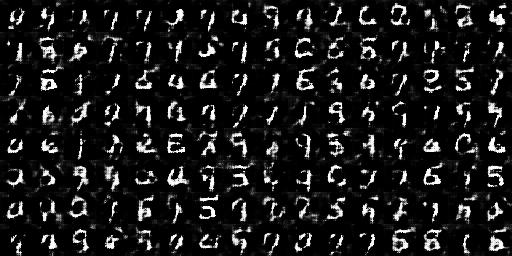
Step1000: 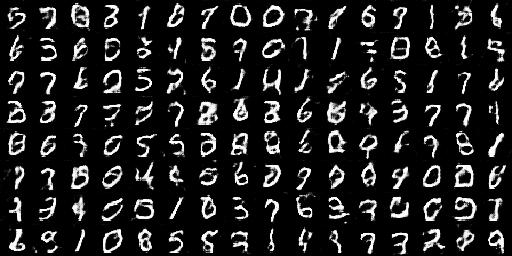